In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ***4x4 Sudoku Test***
---
Test of general preprocessing implementation using the $4\times 4$ sudoku used in *Encoding Strategies to Solve Sudoku with Quantum Computers* [1]. This example is shown in figure $4.1$ page $14$. 

In [23]:
import os

os.getcwd()

'/home/reyguadarrama/qosf/sudoku-nisq/tests/pre-processing'

In [24]:
from python_package.sudoku import Sudoku

In [25]:
# initialize the thesis 4x4 sudoku example as a Sudoku instance
example_sudoku_4x4 = Sudoku("../../data/4x4sudoku.csv")

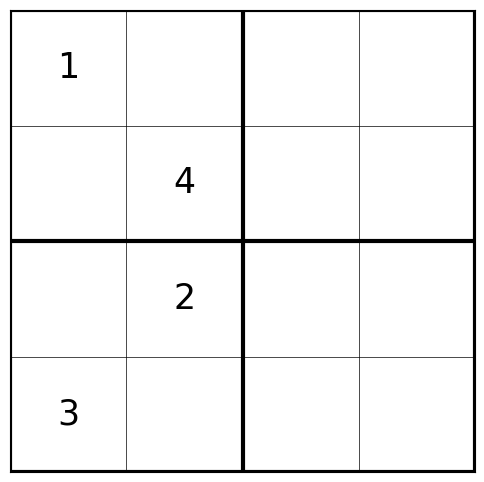

In [26]:
# Show the sudoku initial state grid
example_sudoku_4x4.plot_grid()


## **General Pre-processing**
---
The Preprocessing is divided into two steps:

1. The exclusion of digits by given constraints
2. Checking for new constraints generated by step 1

##### **Initial state**

In [27]:
# Show the initial prefilled cells 
set_tuples = example_sudoku_4x4.set_tuples

print("*** set tuples *** \n")
for cell in set_tuples:
    print(f"cell: {cell}, value: {set_tuples[cell]}")

*** set tuples *** 

cell: (0, 0), value: {1}
cell: (1, 1), value: {4}
cell: (2, 1), value: {2}
cell: (3, 0), value: {3}


In [28]:
# Show the row, column and subunit initial constraints

row_constraints = example_sudoku_4x4.rows_constraints
col_constraints = example_sudoku_4x4.columns_constraints
sub_constraints = example_sudoku_4x4.subunit_constraints

print("*** initial row constraints *** \n")
for cell in row_constraints:
    print(f"row: {cell}, forbiden values: {row_constraints[cell]}")


print("\n *** initial column constraints *** \n")
for cell in col_constraints:
    print(f"column: {cell}, forbiden values: {col_constraints[cell]}")


print("\n *** initial subunit constraints *** \n")
for cell in sub_constraints:
    print(f"sub unit: {cell}, forbiden values: {sub_constraints[cell]}")

*** initial row constraints *** 

row: 0, forbiden values: {1}
row: 1, forbiden values: {4}
row: 2, forbiden values: {2}
row: 3, forbiden values: {3}

 *** initial column constraints *** 

column: 0, forbiden values: {1, 3}
column: 1, forbiden values: {2, 4}

 *** initial subunit constraints *** 

sub unit: (0, 0), forbiden values: {1, 4}
sub unit: (1, 0), forbiden values: {2, 3}


### **Step 1**: ***Digit Exclusion***
---
Dictionaries ```set_tuples```, ```open_tuples``` store the current iteration fixed cell values and all the current iteration for all free cells according with the constraints respectively. The keys are tuples representing the cell in a (row, column) format, meanwhile the values are sets cointatining the valid values to fill the respective cell.

The algorithm iterates over every row and within it over every column. If a cell is empty and thus no digit is given, an new element id appended to ```open_tuples``` containing the cell identification tuple (row, column) and a set with all the possible for such cell. Also it check if a digit already occurs within the respective row, column or subunit and exclude the solutions forbiden by the constraints. After the step 1 there is a dictionary containing all possible assignments for all free cells according to the current constraints.

In [29]:
# Step 1: Digit exclusion
example_sudoku_4x4.digit_exclusion()

# Show the possible cell assignment once applied the step 1
open_tuples = example_sudoku_4x4.open_tuples

print("*** open tuples *** \n")
for cell in open_tuples:
    print(f"cell: {cell}, set values: {open_tuples[cell]}")


*** open tuples *** 

cell: (0, 1), set values: {3}
cell: (0, 2), set values: {2, 3, 4}
cell: (0, 3), set values: {2, 3, 4}
cell: (1, 0), set values: {2}
cell: (1, 2), set values: {1, 2, 3}
cell: (1, 3), set values: {1, 2, 3}
cell: (2, 0), set values: {4}
cell: (2, 2), set values: {1, 3, 4}
cell: (2, 3), set values: {1, 3, 4}
cell: (3, 1), set values: {1}
cell: (3, 2), set values: {1, 2, 4}
cell: (3, 3), set values: {1, 2, 4}


### **Step 2**: ***Constraints Update***
---
In step 2, it is checked whether the computations in step 1 found unique assignments for cells that were previously empty and appends this unique assignments to ```set_tuples```. The cells for which a value was found form new constraints that apply to the empy cells in ```open_tuples``` in the next iteration.

In [30]:
# Step 2: constraints update
example_sudoku_4x4.update_constraints()

# Show the set cell values after the step 1 
set_tuples = example_sudoku_4x4.set_tuples

print("*** new set tuples *** \n")
for cell in set_tuples:
    print(f"cell: {cell}, value: {set_tuples[cell]}")

*** new set tuples *** 

cell: (0, 0), value: {1}
cell: (1, 1), value: {4}
cell: (2, 1), value: {2}
cell: (3, 0), value: {3}
cell: (0, 1), value: {3}
cell: (1, 0), value: {2}
cell: (2, 0), value: {4}
cell: (3, 1), value: {1}


In [31]:
# Show the updated constraints after step 2
row_constraints = example_sudoku_4x4.rows_constraints
col_constraints = example_sudoku_4x4.columns_constraints
sub_constraints = example_sudoku_4x4.subunit_constraints

print("*** new row constraints *** \n")
for cell in row_constraints:
    print(f"row: {cell}, forbiden values: {row_constraints[cell]}")


print("\n*** new column constraints *** \n")
for cell in col_constraints:
    print(f"row: {cell}, forbiden values: {col_constraints[cell]}")


print("\n*** new subunit constraints *** \n")
for cell in sub_constraints:
    print(f"row: {cell}, forbiden values: {sub_constraints[cell]}")


*** new row constraints *** 

row: 0, forbiden values: {1, 3}
row: 1, forbiden values: {2, 4}
row: 2, forbiden values: {2, 4}
row: 3, forbiden values: {1, 3}

*** new column constraints *** 

row: 0, forbiden values: {1, 2, 3, 4}
row: 1, forbiden values: {1, 2, 3, 4}

*** new subunit constraints *** 

row: (0, 0), forbiden values: {1, 2, 3, 4}
row: (1, 0), forbiden values: {1, 2, 3, 4}


### **Algorithm iteration**
---

The algorithm is repeated until no more solved cells emerge after applied the new constraints. At the end of pre-processing ```open tuples``` contains all non-trivial solvable cells with their possible assignments. 

In [32]:
# Second iteration
example_sudoku_4x4.general_preprocessing()

open_tuples = example_sudoku_4x4.open_tuples

print("*** final open tuples *** \n")
for cell in open_tuples:
    print(f"cell: {cell}, set values: {open_tuples[cell]}")

*** final open tuples *** 

cell: (0, 2), set values: {2, 4}
cell: (0, 3), set values: {2, 4}
cell: (1, 2), set values: {1, 3}
cell: (1, 3), set values: {1, 3}
cell: (2, 2), set values: {1, 3}
cell: (2, 3), set values: {1, 3}
cell: (3, 2), set values: {2, 4}
cell: (3, 3), set values: {2, 4}


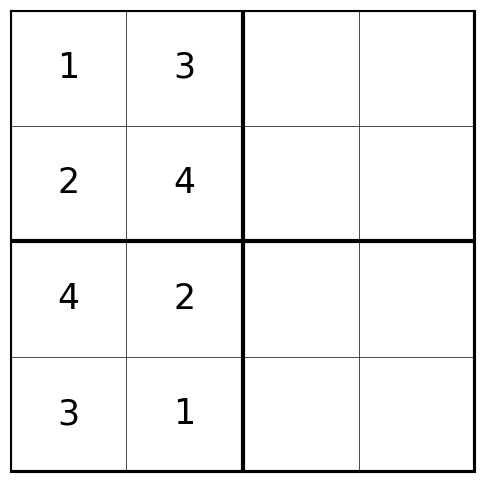

In [33]:
# Show the sudoku final  state grid
example_sudoku_4x4.plot_grid()


## **References**

[1] Weiß, M. W. (2022). Encoding strategies to solve soduko with quantum computers [Bachelorarbeit, Institute für informatik der Ludwig–Maximilians-Universitat München.]. https://elib.dlr.de/193653/1/Abgabe_weiss22.pdf